### CPSC 390 Project 4 -- Perceptron learning

### Your Name: Tyler Edwards


In [31]:
# DO NOT modify this section
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.metrics import accuracy_score

# set up training data and label
X_train=np.array([[1, 1], [3, 2], [2,4], [3, 4], [2,3]])
y_label=np.array([0,1,1,1,0],dtype=int)

# set up initial weight
init_weights = np.array([[0,1,-1]],dtype=float)
init_weights=init_weights.T

# Example of using sklearn accuracy_score
# -- you will populate the y_predicted array based on your perceptron with its updated weights
y_predicted=np.array([0,0,0,0,0],dtype=int)
print('Accuracy score: {}'.format(accuracy_score(y_label, y_predicted)))


Accuracy score: 0.4


### Your implementation starts here

In [32]:
# Your code for the perceptron learning function with a constant learning rate of 1 and the prediction function using your perceptron

def perceptron_learning(X, y, weights, iterations):
    accuracies = [] # stores accuracy values
    weights_list = [] # stores weight values 

    for _ in range(iterations): # loops for the amoung of iterations
        for i in range(len(X)):
            x_with_bias = np.concatenate(([1], X[i])) # add bias term to X[i]

            y_pred = np.dot(x_with_bias, weights) > 0  # calculate prediction

            weights += (y[i] - y_pred) * x_with_bias[:, np.newaxis] # update weights

        # evaluate accuracy
        y_predicted = np.dot(np.column_stack((np.ones(len(X)), X)), weights) > 0
        accuracy = accuracy_score(y, y_predicted)
        accuracies.append(accuracy)
        weights_list.append(weights.copy())

    return accuracies, weights_list

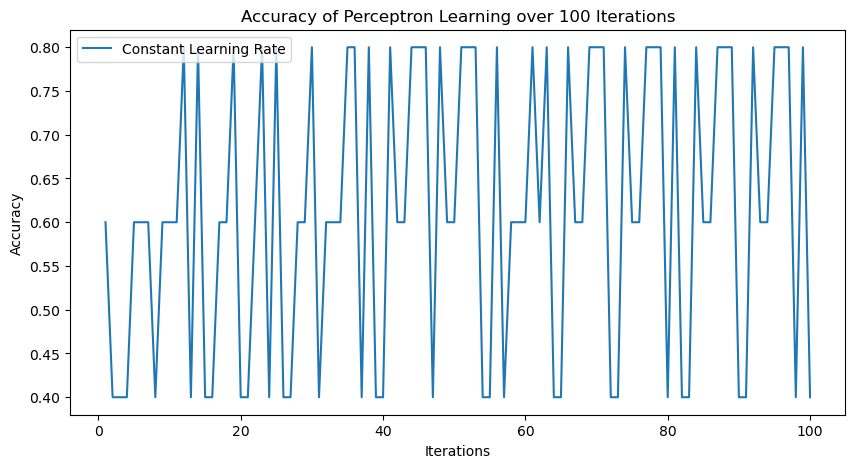

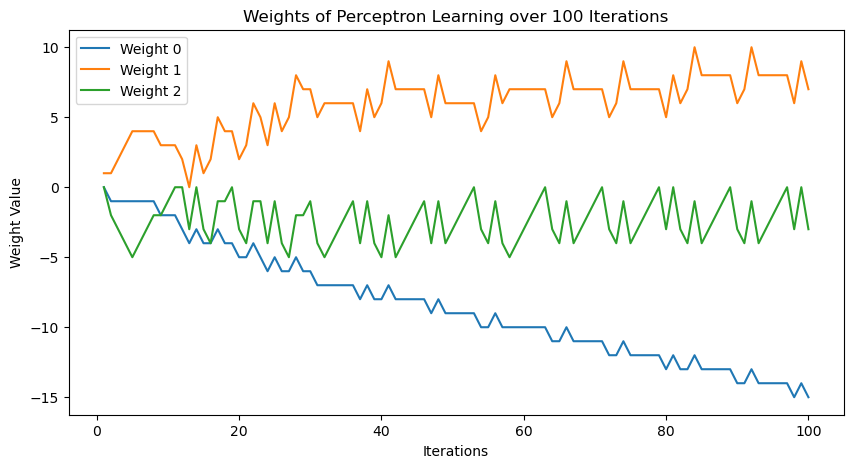

In [33]:
# Your code for calling the perception learning, prediction, evaluation for 100 iterations and do the plots

accuracies_const, weights_list_const = perceptron_learning(X_train, y_label, init_weights, 100)

# Plotting accuracy over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), accuracies_const, label='Constant Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy of Perceptron Learning over 100 Iterations')
plt.legend()
plt.show()

# Plotting weights over iterations
weights_const = np.array(weights_list_const)
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(range(1, 101), weights_const[:, i, 0], label=f'Weight {i}')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.title('Weights of Perceptron Learning over 100 Iterations')
plt.legend()
plt.show()

In [34]:
# Your code for the improved perceptron learning
# (or you can add a decay option to your earlier implementation.  If you do so, make sure the previous code still works )

def perceptron_learning_decay(X, y, weights, c, iterations):
    accuracies = [] # stores accuracy values
    weights_list = [] # stores weight values 

    for t in range(1, iterations+1): # loop for the amoung of iterations, starting from index 1 
        learning_rate = c / (t + c) # set a learning rate
        for i in range(len(X)):
            x_with_bias = np.concatenate(([1], X[i])) # add bias term to X[i]

            y_pred = np.dot(x_with_bias, weights) > 0 # calculate prediction

            weights += learning_rate * (y[i] - y_pred) * x_with_bias[:, np.newaxis] # update weights

        # evaluate accuracy
        X_with_bias = np.column_stack((np.ones(len(X)), X))
        y_predicted = np.dot(X_with_bias, weights) > 0
        accuracy = accuracy_score(y, y_predicted)
        accuracies.append(accuracy)
        weights_list.append(weights.copy())

    return accuracies, weights_list

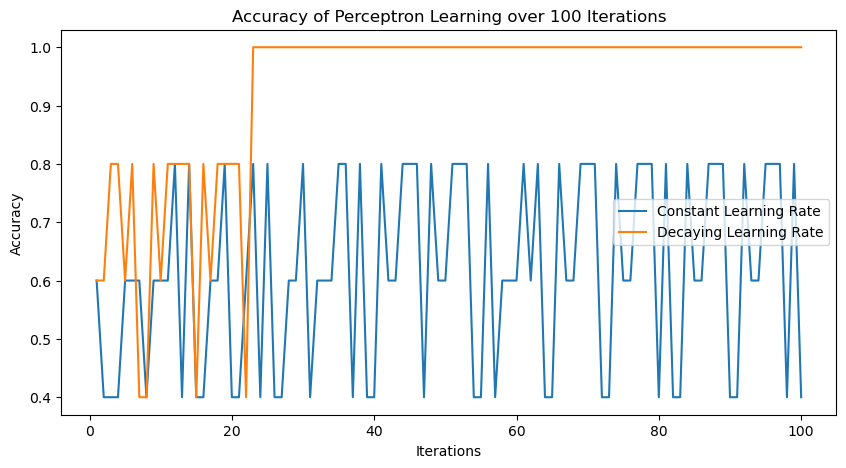

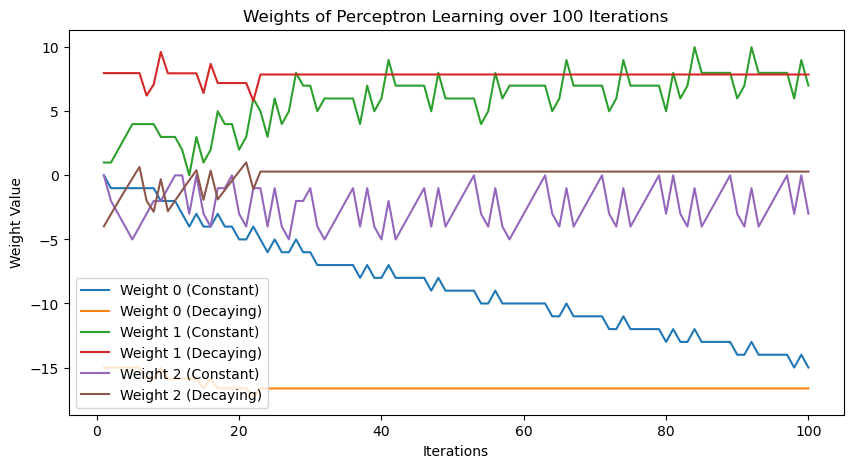

In [35]:
# Your code for calling the improved perceptron learning, prediction, evaluation for 100 iterations and do the plots

accuracies_decay, weights_list_decay = perceptron_learning_decay(X_train, y_label, init_weights, 50, 100)

# Plotting accuracy over iterations for both versions
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), accuracies_const, label='Constant Learning Rate')
plt.plot(range(1, 101), accuracies_decay, label='Decaying Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy of Perceptron Learning over 100 Iterations')
plt.legend()
plt.show()

# Plotting weights over iterations for both versions
weights_const = np.array(weights_list_const)
weights_decay = np.array(weights_list_decay)
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(range(1, 101), weights_const[:, i, 0], label=f'Weight {i} (Constant)')
    plt.plot(range(1, 101), weights_decay[:, i, 0], label=f'Weight {i} (Decaying)')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.title('Weights of Perceptron Learning over 100 Iterations')
plt.legend()
plt.show()

### Discuss how you chose the constant to decay the learning rate and what you learned in the process.

The decay constant (c) in the learning rate algorithm is extremely important because it will greatly effect the process's speed and stability. While it may seem better to just pick a really high decay rate, often that will result in the process overshooting its intended target, forcing it to readjust accordingly. However, a low decay rate will take forever to reach the optimal solution. So picking the value is about finding that balance between the stability and the speed, which I found as 50 in this problem.

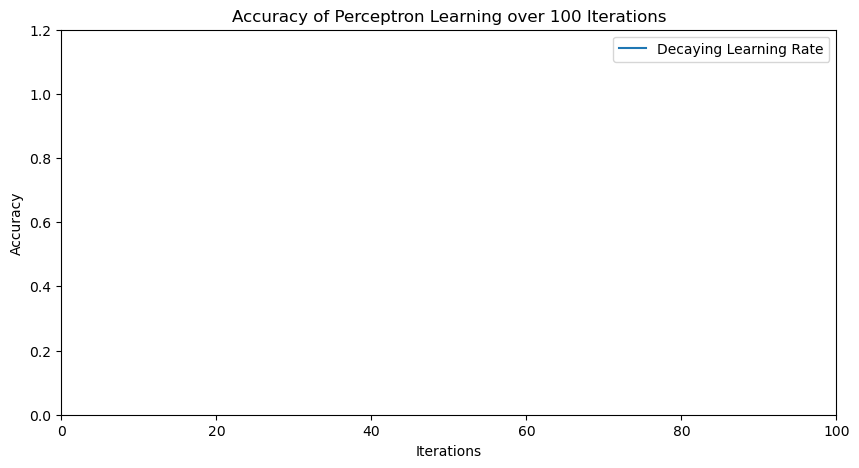

In [36]:
# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Perceptron Learning over 100 Iterations')
line, = ax.plot([], [], label='Decaying Learning Rate')
ax.legend()

# Initialize the line to be animated
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(i):
    line.set_data(range(1, i+1), accuracies_decay[:i])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True)

# Show the animation
plt.show()

# import HTML so that the animation functions
from IPython.display import HTML
HTML(ani.to_jshtml())